In [1]:
# 사용할 라이브러리 불러오기

import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns


In [2]:
train = pd.read_csv('C:\\Users\\user\\Downloads\\archive\\sign_mnist_train\\sign_mnist_train.csv')
test = pd.read_csv('C:\\Users\\user\\Downloads\\archive\\sign_mnist_test\\sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# get our training labels

labels = train['label'].values

In [5]:
# view the unique values , 24 in totals

unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

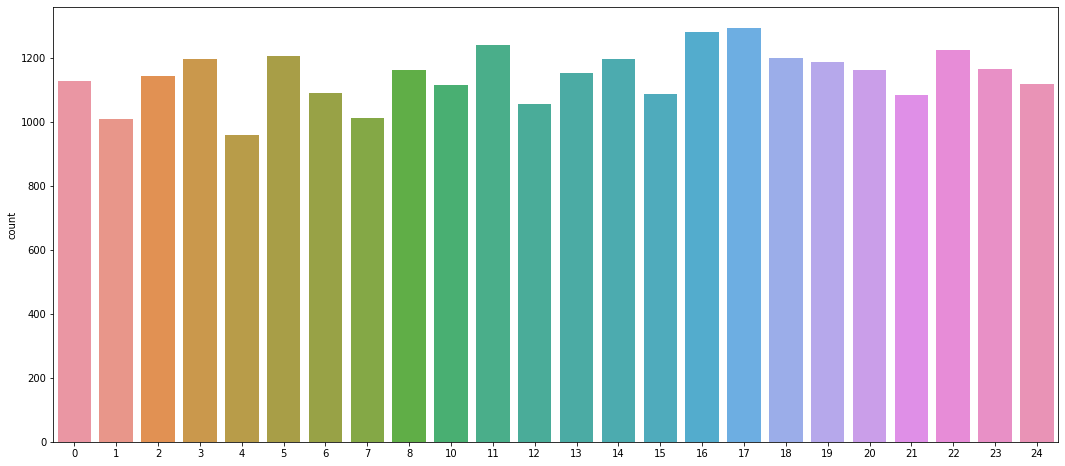

In [6]:
# plot the quantities in each class

plt.figure(figsize = (18, 8))
sns.countplot(x = labels)

In [7]:
# drop training labels from our training data so we can seperate it
train.drop('label', axis = 1, inplace = True)

In [8]:
# extract the image data from each row in our csv, remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
# hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [10]:
# view our labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


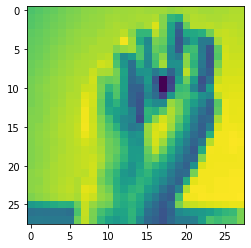

In [11]:
# inspect an image
index = 4
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [12]:
# use cv2 to view 10 random images from our training data

import cv2
import numpy as np

for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    
    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size= 0.3, random_state= 101)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 1
num_classes = 24
epochs = 5

In [33]:
x_train = x_train / 255
y_train = y_train / 255

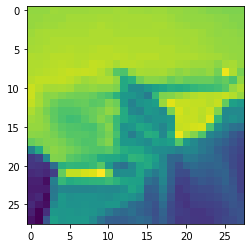

In [34]:
# reshape them into the size required by TF and Keras

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

plt.imshow(x_train[19217].reshape(28, 28))

In [35]:
# create CNN md
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu', input_shape=(28, 28, 1) ))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [36]:
# compile
model.compile(loss = 'categorical_crossentropy',
            optimizer = Adam(),
            metrics=['accuracy'])

In [37]:
print(model.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000002604EAF7D30>>


In [52]:
#train model

history = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/5
19218/19218 [==============================] - 23s 1ms/step - loss: 0.0957 - accuracy: 0.0427 - val_loss: 45473271189078016.0000 - val_accuracy: 0.0384
Epoch 2/5
19218/19218 [==============================] - 23s 1ms/step - loss: 0.1857 - accuracy: 0.0423 - val_loss: 106921570156412928.0000 - val_accuracy: 0.0438
Epoch 3/5
19218/19218 [==============================] - 23s 1ms/step - loss: 0.3291 - accuracy: 0.0427 - val_loss: 149080565407023104.0000 - val_accuracy: 0.0429
Epoch 4/5
19218/19218 [==============================] - 23s 1ms/step - loss: 0.5425 - accuracy: 0.0412 - val_loss: 324111701173600256.0000 - val_accuracy: 0.0410
Epoch 5/5
19218/19218 [==============================] - 23s 1ms/step - loss: 0.8372 - accuracy: 0.0425 - val_loss: 422230091611766784.0000 - val_accuracy: 0.0484


In [ ]:
#save model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

INFO:tensorflow:Assets written to: sign_mnist_cnn_50_Epochs.hs\assets
Model Saved


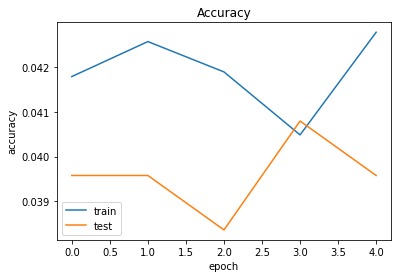

In [ ]:
# view our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', 'test'])

plt.show()

In [ ]:
# reshape our test data so that we can evaluate it's performance on unseen data
test_labels = test['label']
test.drop('label', axis=1, inplace= True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

In [ ]:
# get our accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.06079196876742889

In [ ]:
# create function to match label to letter
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"


# Test on actual webcam input

In [ ]:
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()

    ##############################
    #frame = cv2.flip(frame, 1)

    #define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi',roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation= cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray',roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)

    roi = roi.reshape(1, 28, 28,1)

    result = str(model.predict(roi, 1, verbose= 0)[0])
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
cap.release()
cv2.destroyAllWindows()
